## **<center><font style="color:rgb(100,109,254)">Logistic Regression</font> </center>** 
## **<center><font style="color:rgb(100,109,254)">(Predicting Numbers)</font> </center>** 
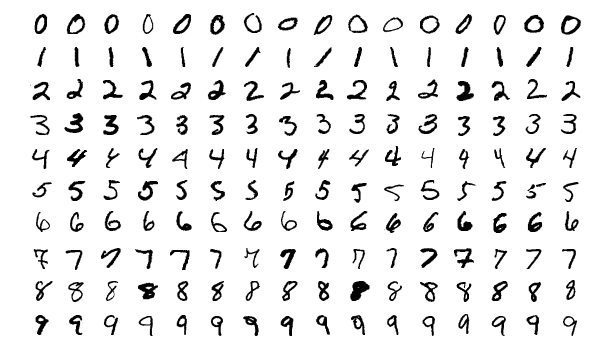

## 01. Import Libraries

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics


## 02. Load Digit Dataset

In [2]:
digitDataset = load_digits()
digitDataset

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

## 03. Determining the total no. of images and labels in Dataset

In [3]:
print(f"Image Data shape: {digitDataset.data.shape}")
print(f"Label or Target Data shape: {digitDataset.target.shape}")

Image Data shape: (1797, 64)
Label or Target Data shape: (1797,)


## 04. Displaying the some of Images and Label

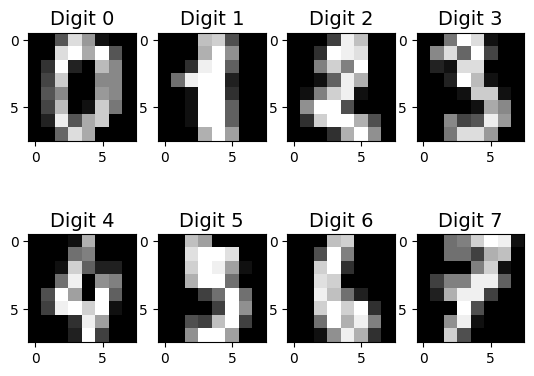

In [5]:
for i in range(8 ):
    plt.subplot(2,4,i+1)
    img = digitDataset.data[i]
    
    plt.imshow(np.reshape(img,(8,8)), cmap=plt.cm.gray)
    plt.title(f"Digit {digitDataset.target[i]}", fontsize = 14)

## 05. X and Y from Dataset

# X

In [6]:
x = digitDataset.data
x

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [19]:
x.shape

(1797, 64)

# Y

In [20]:
y = digitDataset.target
y

array([0, 1, 2, ..., 8, 9, 8])

## 06. Split Dataset into Training and Testing Dataset

In [21]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=2)

In [22]:
xTrain.shape

(1437, 64)

In [23]:
yTrain.shape

(1437,)

In [24]:
xTest.shape

(360, 64)

In [25]:
yTest.shape

(360,)

## 07. Import Logistic Regression Model

In [26]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

## 08. Fit the Model

In [27]:
model.fit(xTrain, yTrain)

C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## 09. Predict Using model

In [28]:
model.predict(xTest[0].reshape(1,-1))

array([4])

In [29]:
yTest[0]

4

(39, 32)

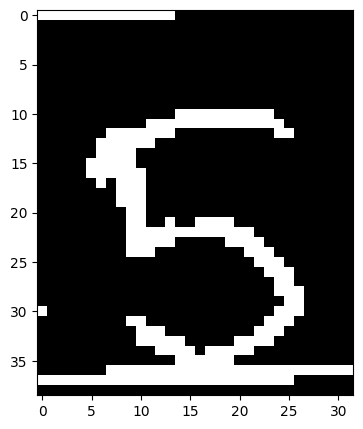

In [64]:
import cv2

img = cv2.imread("2.PNG")
grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

_, binaryImage = cv2.threshold(grayImage, 90, 255, cv2.THRESH_BINARY_INV)

plt.figure(figsize=(5,5))
plt.imshow(binaryImage, cmap=plt.cm.gray)
binaryImage.shape

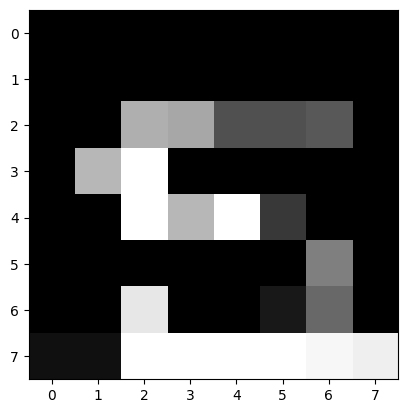

In [65]:


resizedImage = cv2.resize(binaryImage, (8,8))
flattenImage = resizedImage.flatten().reshape(1,-1)
flattenImage.shape

plt.imshow(np.reshape(flattenImage,(8,8)), cmap=plt.cm.gray)

In [66]:
model.predict(flattenImage)

array([1])

## **<center><font style="color:rgb(10,200,0)">Predict the digit accurately!</font> </center>** 

## **<font style="color:rgb(200,100,0)">Predict the entire Testing Dataset!</font>** 

In [35]:
pred = model.predict(xTest)

## 10. Accuracy Check

In [36]:
accuracy = model.score(xTest, yTest)
accuracy

0.9444444444444444

## **<center><font style="color:rgb(10,200,0)">Accuracy = 94%</font> </center>** 

## 11. Confusion Matrix

In [37]:
import seaborn as sns
from sklearn import metrics

In [38]:
confusionMetrix = metrics.confusion_matrix(yTest, pred)
confusionMetrix

array([[31,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 41,  0,  1,  0,  0,  0,  0,  1,  1],
       [ 0,  0, 31,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  0,  0,  1,  2,  0],
       [ 0,  0,  0,  0, 31,  0,  0,  0,  3,  1],
       [ 0,  1,  0,  0,  1, 41,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 33,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 35,  1],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  1, 25]], dtype=int64)

## 12. Heat Map

Text(0.5, 1.0, 'Accuracy: 94 %')

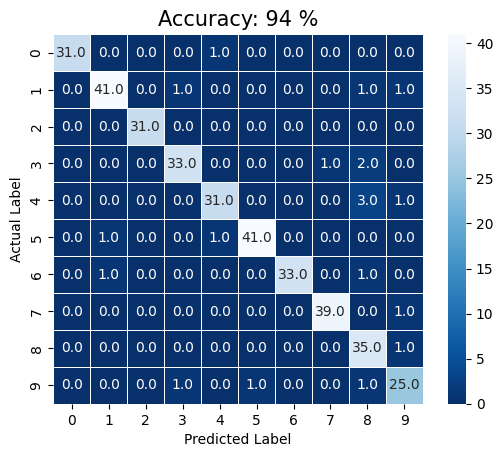

In [47]:
sns.heatmap(confusionMetrix, annot=True, fmt=".1f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.title(f"Accuracy: {int(accuracy * 100)} %", size = 15)

******